# Machine Learning for Sentiment Analysis using Bag of Words Model 

In [1]:
#importing the necessary libraries 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import string

#NLTK library 
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# SKlearn Library 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s1890293/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/s1890293/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# import the input and output (supervised Learning)  
x = pd.read_csv('x_train.csv')
y = pd.read_csv('y_train.csv')

In [3]:
y_df = y["is_positive_sentiment"].values #convert to array 

In [4]:
x_df = x["text"].values #convert to array 

## Preprocessing Step - Vocabulary Development 

In [5]:
# create functions for developing the vocabulary 

def word_extraction(text):
    #convert to tokens 
    tokens = word_tokenize(text) 
    # remove punctuation
    table = str.maketrans('', '', string.punctuation) 
    tokens = [w.translate(table) for w in tokens]  
    #remove non-alphabetic words
    tokens = [word for word in tokens if word.isalpha()] 
    stop_words = set(stopwords.words('english')) #list of english stop words 
    tokens = [w for w in tokens if not w in stop_words] #remove english stop words 
    tokens = [word for word in tokens if len(word) > 1] #remove one-lettered words 
    tokens = [w.lower() for w in tokens] #convert all words to lower case 
    return (tokens)

def tokenize (x_df):
    words =[]
    for text in x_df:
        w  = word_extraction(text) #preprocess using the intially defined function 
        words.extend(w)
        words = sorted((set(words))) #return a vocabulary of words 
    return (words)

## Model Development 

### Logistic Regression Model 

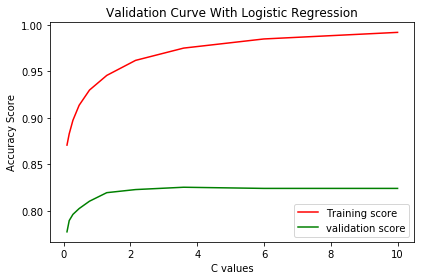

In [6]:
#create a vectorised array based on the vocabulary developed 
vectorizer = TfidfVectorizer(vocabulary= tokenize(x_df))  

#Define the range for the Hyper-parameter C in Logistic Regression 
param_range =np.logspace(-1, 1, 10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(LogisticRegression( random_state=1, class_weight = "balanced"), 
                                         vectorizer.fit_transform(x_df), 
                                             y_df, 
                                             param_name="C", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="validation score", color="g")

# Create plot of Mean Accuracy Score 
plt.title("Validation Curve With Logistic Regression")
plt.xlabel("C values")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure1")
plt.show()


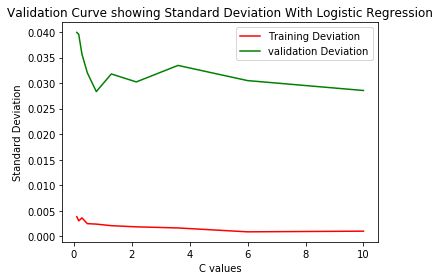

In [7]:
# Create plot of Standard Deviation of Accuracy Score
plt.plot(param_range, train_std, label="Training Deviation", color="r")
plt.plot(param_range, test_std, label="validation Deviation", color="g")
plt.title("Validation Curve showing Standard Deviation With Logistic Regression")
plt.xlabel("C values")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure1a")
plt.show()

### Neural Network Model 

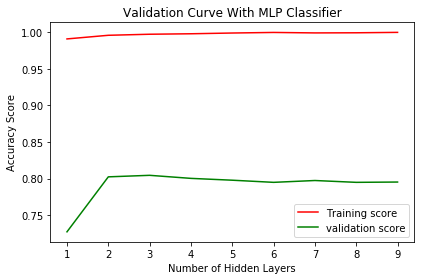

In [8]:
# Create plot of Mean Accuracy Score
vectorizer = TfidfVectorizer(vocabulary= tokenize(x_df))  

#Define the range for the Hyper-parameter "Number of Hidden Layers" in Neural Network
param_range =range (1,10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(MLPClassifier( random_state=1), 
                                             vectorizer.fit_transform(x_df), 
                                             y_df, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets

plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="validation score", color="g")

# Create plot of Mean Accuracy Score
plt.title("Validation Curve With MLP Classifier")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure2")
plt.show()


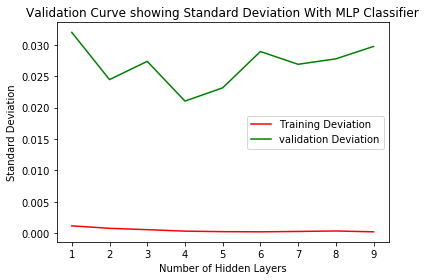

In [9]:
# Create plot of Standard Deviation of Accuracy Score
plt.plot(param_range, train_std, label="Training Deviation", color="r")
plt.plot(param_range, test_std, label="validation Deviation", color="g")
plt.title("Validation Curve showing Standard Deviation With MLP Classifier")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure2a")
plt.show()

### Support Vector Machine (SVM)

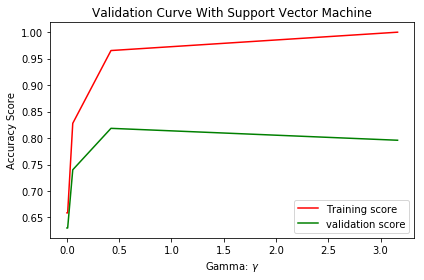

In [10]:
#create a vectorised array based on the vocabulary developed 
vectorizer = TfidfVectorizer(vocabulary= tokenize(x_df))  

#Define the range for the Hyper-parameter "Gamma" in Support Vectors Machine 
param_range =np.logspace(-3, 0.5, 5)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(svm.SVC( random_state=1), 
                                             vectorizer.fit_transform(x_df), 
                                             y_df, 
                                             param_name="gamma", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="validation score", color="g")

# Create plot of Mean Accuracy Score 
plt.title("Validation Curve With Support Vector Machine")
plt.xlabel(r"Gamma: $\gamma$")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("figure3")
plt.show()

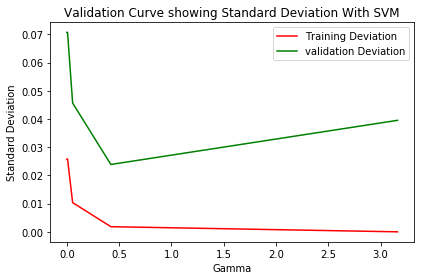

In [11]:
# Create plot of Standard Deviation of Accuracy Score
plt.plot(param_range, train_std, label="Training Deviation", color="r")
plt.plot(param_range, test_std, label="validation Deviation", color="g")
plt.title("Validation Curve showing Standard Deviation With SVM")
plt.xlabel("Gamma")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure3a")
plt.show()

## More details

More information of how this code was run can be found in my blog post below:
https://sites.tufts.edu/olukunleowolabi/2020/02/13/sentiment-analysis-using-bag-of-words-model/